# test 10

Bienvenue dans ce chapitre interactif utilisant ThebeLab !

## Exemple de code interactif

```{thebe-button}

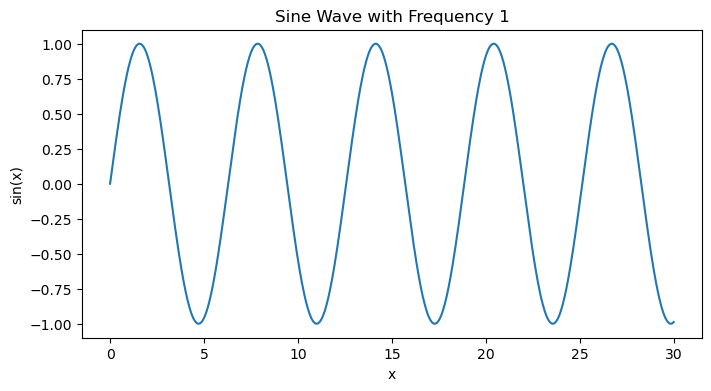

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sine(frequency=1):
    x = np.linspace(0, 30, 1000)
    y = np.sin(frequency * x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.title(f'Sine Wave with Frequency {frequency}')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.show()

plot_sine()

In [17]:
import dolfinx
import ufl
from mpi4py import MPI

# Votre code dolfinx ici


In [16]:
import dolfinx
print(dolfinx.__version__)

0.8.0


In [12]:
try:
    import dolfinx
    print("dolfinx importé avec succès")
except ImportError as e:
    print(f"Erreur lors de l'importation de dolfinx : {e}")
    import sys
    print(f"Python path : {sys.path}")

dolfinx importé avec succès


In [13]:
import dolfinx
print(f"DOLFINx version: {dolfinx.__version__} based on GIT commit: {dolfinx.git_commit_hash} of https://github.com/FEniCS/dolfinx/")

DOLFINx version: 0.8.0 based on GIT commit:  of https://github.com/FEniCS/dolfinx/


In [14]:
# Importer les modules nécessaires
import pyvista as pv
from pyvista import examples

# Créer une simple sphère
sphere = pv.Sphere(radius=1.0, center=(0, 0, 0))

# Initialiser un Plotter pour afficher la géométrie
plotter = pv.Plotter()
plotter.add_mesh(sphere, color="cyan", show_edges=True)
plotter.add_axes()  # Ajoute des axes pour faciliter la visualisation
plotter.show()

Widget(value='<iframe src="http://localhost:52234/index.html?ui=P_0x1670efb90_3&reconnect=auto" class="pyvista…